## 不同阈值下的准确率和召回率曲线

<img src='./picture/6-1.png'>
<img src='./picture/6-2.png'>
<img src='./picture/6-3.png'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [2]:
import sys
sys.path.append('E:\github\ml_practice\ml_python')
from model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed = 666)
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [3]:
decision_scores = log_reg.decision_function(X_test)

In [4]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls =[]
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

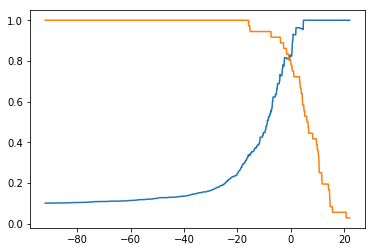

In [5]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

## precision - recall 曲线

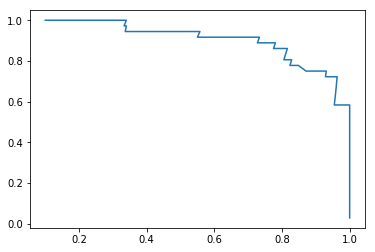

In [6]:
plt.plot(precisions, recalls)
plt.show()

## sklearn 中的precision - recall曲线

In [7]:
from sklearn.metrics import precision_recall_curve

In [15]:
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [16]:
len(precisions)

107

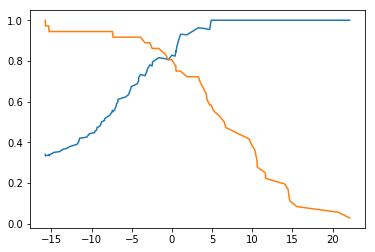

In [19]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

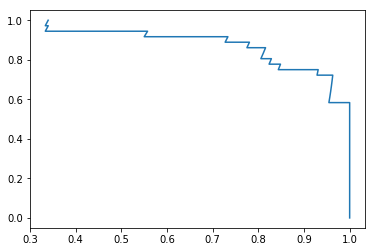

In [20]:
plt.plot(precisions, recalls)
plt.show()